In [1]:
import random

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from surprise import Reader, SVD
from surprise.dataset import DatasetAutoFolds

from recommender.testing.custom_metric_utils import calculate_metric_scores
from recommender.testing.custom_metric_utils import create_recommendations_profiles_embeddings
from recommender.tools.surprise_utils import SurpriseTests

DATA_ROOT='../../data'

## Data loading

In [2]:
columns = ['bgg_user_name', 'bgg_id', 'bgg_user_rating']
train_df = pd.read_csv(f'{DATA_ROOT}/ratings_train_explicit.csv.gz')[columns]
train_df_implicit = pd.read_csv(f'{DATA_ROOT}/ratings_train_implicit.csv.gz')
test_df = pd.read_csv(f'{DATA_ROOT}/ratings_test_explicit.csv.gz')[columns]

features_names = pd.read_csv(f'{DATA_ROOT}/game_features_names.csv.gz').values.flatten()
games_df = pd.read_json(f'{DATA_ROOT}/bgg_GameItem.jl', lines=True)\
[['bgg_id', 'mechanic', 'category', 'complexity', 'max_players_best', 'min_players_best', 'max_players_rec', 'min_players_rec']]

users_profiles = pd.read_pickle(f'{DATA_ROOT}/users_profiles.pkl')
test_users_profiles = pd.read_pickle(f'{DATA_ROOT}/test_users_profiles.pkl')

## Data processing

In [3]:
mechanics_names = features_names[:20]
categories_names = features_names[20:40]

In [4]:
reader = Reader(rating_scale=(1, 10))
trainset = DatasetAutoFolds.load_from_df(train_df, reader).build_full_trainset()

In [5]:
users_profiles = users_profiles[users_profiles.index.isin(train_df['bgg_user_name'].unique())]
test_users_profiles = test_users_profiles[test_users_profiles.index.isin(train_df['bgg_user_name'].unique())]

In [6]:
users_profiles.values[:, :40] *= 3
test_users_profiles.values[:, :40] *= 3

## Training and evaluation

In [7]:
random.seed(42)
np.random.seed(42)

random_users_id = np.random.choice(test_users_profiles.index.values, size=2000, replace=False)
random_users_id.sort()

train_metrics_vals = []
test_metrics_vals = []
test_rmse_scores = []

for epochs in [2, 4, 8, 16, 32, 64, 128]:
    print("Epochs: ", epochs)
    model = SVD(n_epochs=epochs, n_factors=70, verbose=True)
    model.fit(trainset)

    test_class = SurpriseTests(model=model, test_df=test_df, trainset=trainset)
    test_rmse = test_class.rmse()
    test_rmse_scores.append(test_rmse)
    print("Test RMSE: ", test_rmse)
    num_recs = 5
    print("Creating recommendation profiles")
    recommendation_profiles = create_recommendations_profiles_embeddings(
        test_class.get_top_n(num_recs, np.array(list(map(lambda x: trainset.to_inner_uid(x), random_users_id)))), num_recs, games_df, categories_names, mechanics_names, 10)
    train_metric = calculate_metric_scores(recommendation_profiles, users_profiles.loc[random_users_id])
    train_metrics_vals.append(train_metric)
    print("Train custom metric: ", train_metric)
    test_metric = calculate_metric_scores(recommendation_profiles, test_users_profiles.loc[random_users_id])
    test_metrics_vals.append(test_metric)
    print("Test custom metric: ", test_metric)

Epochs:  2
Processing epoch 0
Processing epoch 1
Test RMSE:  1.2520363194031545
Creating recommendation profiles


  0%|          | 0/2000 [00:00<?, ?it/s]

Train custom metric:  [0.52963114 1.10292455 0.38101412 0.22408632 2.23765613]
Test custom metric:  [0.52827406 1.10072161 0.37967223 0.22574725 2.23441515]
Epochs:  4
Processing epoch 0
Processing epoch 1
Processing epoch 2
Processing epoch 3
Test RMSE:  1.2214595742243153
Creating recommendation profiles


  0%|          | 0/2000 [00:00<?, ?it/s]

Train custom metric:  [0.52822007 1.06751561 0.38952732 0.22913085 2.21439385]
Test custom metric:  [0.5275991  1.06534747 0.38748421 0.23073377 2.21116455]
Epochs:  8
Processing epoch 0
Processing epoch 1
Processing epoch 2
Processing epoch 3
Processing epoch 4
Processing epoch 5
Processing epoch 6
Processing epoch 7
Test RMSE:  1.1854889190140894
Creating recommendation profiles


  0%|          | 0/2000 [00:00<?, ?it/s]

Train custom metric:  [0.56839965 1.06361606 0.3917534  0.30345324 2.32722235]
Test custom metric:  [0.56630907 1.06153658 0.39001517 0.3049424  2.32280323]
Epochs:  16
Processing epoch 0
Processing epoch 1
Processing epoch 2
Processing epoch 3
Processing epoch 4
Processing epoch 5
Processing epoch 6
Processing epoch 7
Processing epoch 8
Processing epoch 9
Processing epoch 10
Processing epoch 11
Processing epoch 12
Processing epoch 13
Processing epoch 14
Processing epoch 15
Test RMSE:  1.182281102023372
Creating recommendation profiles


  0%|          | 0/2000 [00:00<?, ?it/s]

Train custom metric:  [0.56668173 1.0409112  0.35434804 0.38218137 2.34412234]
Test custom metric:  [0.56601868 1.04141198 0.35301094 0.38494544 2.34538704]
Epochs:  32
Processing epoch 0
Processing epoch 1
Processing epoch 2
Processing epoch 3
Processing epoch 4
Processing epoch 5
Processing epoch 6
Processing epoch 7
Processing epoch 8
Processing epoch 9
Processing epoch 10
Processing epoch 11
Processing epoch 12
Processing epoch 13
Processing epoch 14
Processing epoch 15
Processing epoch 16
Processing epoch 17
Processing epoch 18
Processing epoch 19
Processing epoch 20
Processing epoch 21
Processing epoch 22
Processing epoch 23
Processing epoch 24
Processing epoch 25
Processing epoch 26
Processing epoch 27
Processing epoch 28
Processing epoch 29
Processing epoch 30
Processing epoch 31
Test RMSE:  1.2148507990557404
Creating recommendation profiles


  0%|          | 0/2000 [00:00<?, ?it/s]

Train custom metric:  [0.55314787 0.94420945 0.34302867 0.43592448 2.27631047]
Test custom metric:  [0.55237968 0.94403969 0.34222562 0.439156   2.27780099]
Epochs:  64
Processing epoch 0
Processing epoch 1
Processing epoch 2
Processing epoch 3
Processing epoch 4
Processing epoch 5
Processing epoch 6
Processing epoch 7
Processing epoch 8
Processing epoch 9
Processing epoch 10
Processing epoch 11
Processing epoch 12
Processing epoch 13
Processing epoch 14
Processing epoch 15
Processing epoch 16
Processing epoch 17
Processing epoch 18
Processing epoch 19
Processing epoch 20
Processing epoch 21
Processing epoch 22
Processing epoch 23
Processing epoch 24
Processing epoch 25
Processing epoch 26
Processing epoch 27
Processing epoch 28
Processing epoch 29
Processing epoch 30
Processing epoch 31
Processing epoch 32
Processing epoch 33
Processing epoch 34
Processing epoch 35
Processing epoch 36
Processing epoch 37
Processing epoch 38
Processing epoch 39
Processing epoch 40
Processing epoch 41
P

  0%|          | 0/2000 [00:00<?, ?it/s]

Train custom metric:  [0.53673487 0.88204666 0.34961552 0.46729679 2.23569383]
Test custom metric:  [0.53382288 0.88066847 0.34800583 0.47131253 2.23380971]
Epochs:  128
Processing epoch 0
Processing epoch 1
Processing epoch 2
Processing epoch 3
Processing epoch 4
Processing epoch 5
Processing epoch 6
Processing epoch 7
Processing epoch 8
Processing epoch 9
Processing epoch 10
Processing epoch 11
Processing epoch 12
Processing epoch 13
Processing epoch 14
Processing epoch 15
Processing epoch 16
Processing epoch 17
Processing epoch 18
Processing epoch 19
Processing epoch 20
Processing epoch 21
Processing epoch 22
Processing epoch 23
Processing epoch 24
Processing epoch 25
Processing epoch 26
Processing epoch 27
Processing epoch 28
Processing epoch 29
Processing epoch 30
Processing epoch 31
Processing epoch 32
Processing epoch 33
Processing epoch 34
Processing epoch 35
Processing epoch 36
Processing epoch 37
Processing epoch 38
Processing epoch 39
Processing epoch 40
Processing epoch 41


  0%|          | 0/2000 [00:00<?, ?it/s]

Train custom metric:  [0.52361437 0.83544693 0.35424856 0.49016651 2.20347637]
Test custom metric:  [0.52286609 0.8335634  0.35274538 0.49446737 2.20364224]


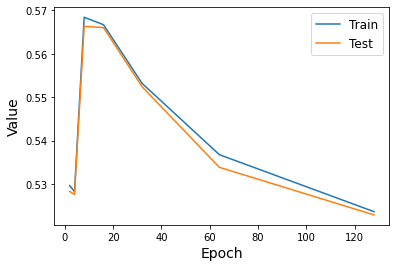

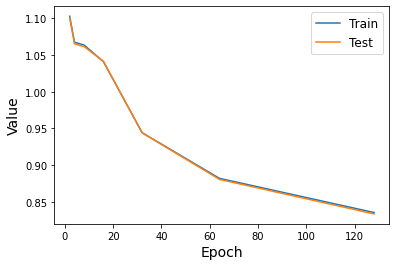

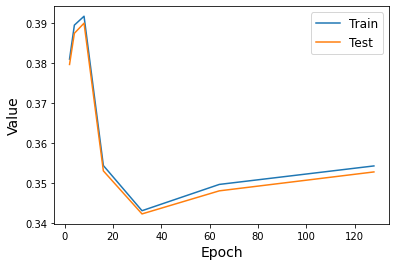

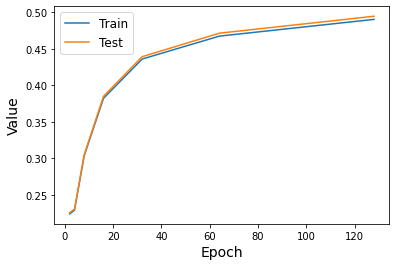

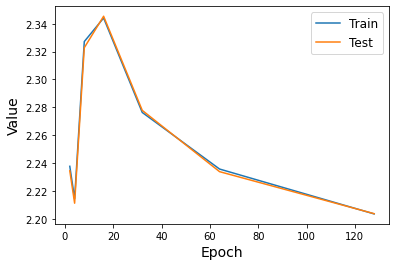

In [8]:
for i in range(5):
    plt.figure()
    plt.plot(np.array([2, 4, 8, 16, 32, 64, 128]), np.array(train_metrics_vals)[:, i], label='Train')
    plt.plot(np.array([2, 4, 8, 16, 32, 64, 128]), np.array(test_metrics_vals)[:, i], label='Test')
    plt.xlabel("Epoch", fontsize=14)
    plt.ylabel("Value", fontsize=14)
    plt.legend(prop={'size': 12})

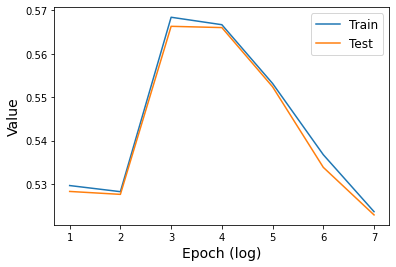

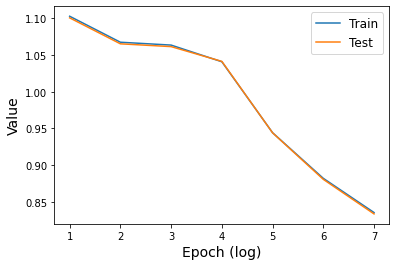

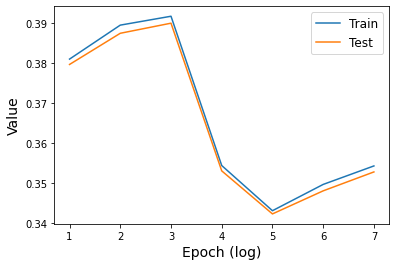

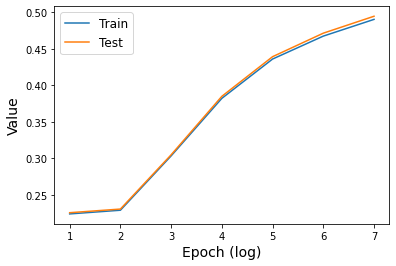

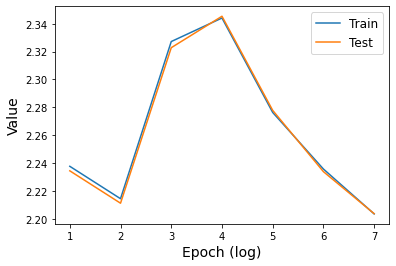

In [9]:
for i in range(5):
    plt.figure()
    plt.plot(np.array([1, 2, 3, 4, 5, 6, 7]), np.array(train_metrics_vals)[:, i], label='Train')
    plt.plot(np.array([1, 2, 3, 4, 5, 6, 7]), np.array(test_metrics_vals)[:, i], label='Test')
    plt.xlabel("Epoch (log)", fontsize=14)
    plt.ylabel("Value", fontsize=14)
    plt.legend(prop={'size': 12})

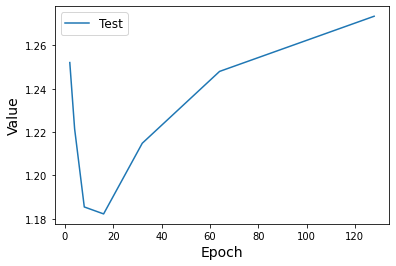

In [10]:
plt.figure()
plt.plot(np.array([2, 4, 8, 16, 32, 64, 128]), np.array(test_rmse_scores), label='Test')
plt.xlabel("Epoch", fontsize=14)
plt.ylabel("Value", fontsize=14)
plt.legend(prop={'size': 12})

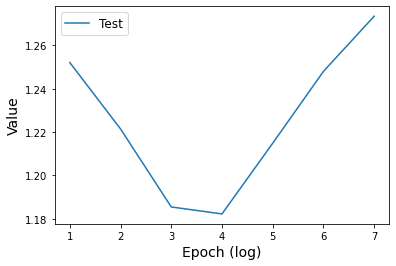

In [11]:
plt.figure()
plt.plot(np.array([1, 2, 3, 4, 5, 6, 7]), np.array(test_rmse_scores), label='Test')
plt.xlabel("Epoch (log)", fontsize=14)
plt.ylabel("Value", fontsize=14)
plt.legend(prop={'size': 12})